In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import scipy.spatial
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> The Dot Product</font>

Consider two vectors

$$
\mathbf{u}=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right] \quad \text { and } \bf{v}=\left[\begin{array}{l}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]
$$

The dot product of $\mathbf{u}$ and $\mathbf{v}$,i.e. $\mathbf{u}\cdot\mathbf{v}$ is defined as

$$
\left[\begin{array}{llll}
u_{1} & u_{2} & \cdots & u_{n}
\end{array}\right]\left[\begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]=u_{1} v_{1}+u_{2} v_{2}+\cdots+u_{n} v_{n}
$$

We can generate two random vectors, then let's compare operations in NumPy.

In [4]:
u = np.round(100*np.random.randn(10))
v = np.round(100*np.random.randn(10))

In [5]:
u*v # this is element-wise multiplication

array([ -846., -1700., -6486., -1886., -1100.,  6776., -6210.,  1586.,
        -245.,  2394.])

In [6]:
u@v # matrix multiplication

In [7]:
np.inner(u,v) # inner product here is the same as matrix multiplication

SymPy operation is the same like in linear algebra.

In [6]:
u = sy.randMatrix(1, 10)
v = sy.randMatrix(1, 10)

In [7]:
u*v.T

# <font face="gotham" color="purple"> The Norm of a Vector</font>

The <font face="gotham" color="red">norm</font> is the length of a vector, definted by

$$
\|\mathbf{v}\|=\sqrt{\mathbf{v} \cdot \mathbf{v}}=\sqrt{v_{1}^{2}+v_{2}^{2}+\cdots+v_{n}^{2}}, \quad \text { and } \quad\|\mathbf{v}\|^{2}=\mathbf{v} \cdot \mathbf{v}
$$

A NumPy built-in ```np.linalg.norm()``` is for computing norms.The default setting is to compute the length of vectors from origins.

In [8]:
a = [2, 6]
np.linalg.norm(a)

Verify the results.

In [9]:
np.sqrt(2**2 + 6**2)

We can also compute a group of vectors' length, for instance $(2, 6)^T$, $(8, 2)^T$, $(9, 1)^T$

In [10]:
A = np.array([[2, 8, 9], 
              [6, 2, 1]])
np.linalg.norm(A, axis = 0)

array([6.32455532, 8.24621125, 9.05538514])

# <font face="gotham" color="purple"> Distance in $\mathbb{R}^n$</font>

For $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^{n}$, the distance between $\mathbf{u}$ and $\mathbf{v},$ written as dist $(\mathbf{u}, \mathbf{v}),$ is the length of the vector $\mathbf{u}-\mathbf{v} .$ That is,

$$
\operatorname{dist}(\mathbf{u}, \mathbf{v})=\|\mathbf{u}-\mathbf{v}\|
$$

Suppose we have two vectors $\mathbf{u} = (2, 9)$ and $\mathbf{v} = (-3, 4)$, compute the distance and visualize the results.

In [11]:
u = np.array([2, 9])
v = np.array([-3, 4])
np.linalg.norm(u - v)

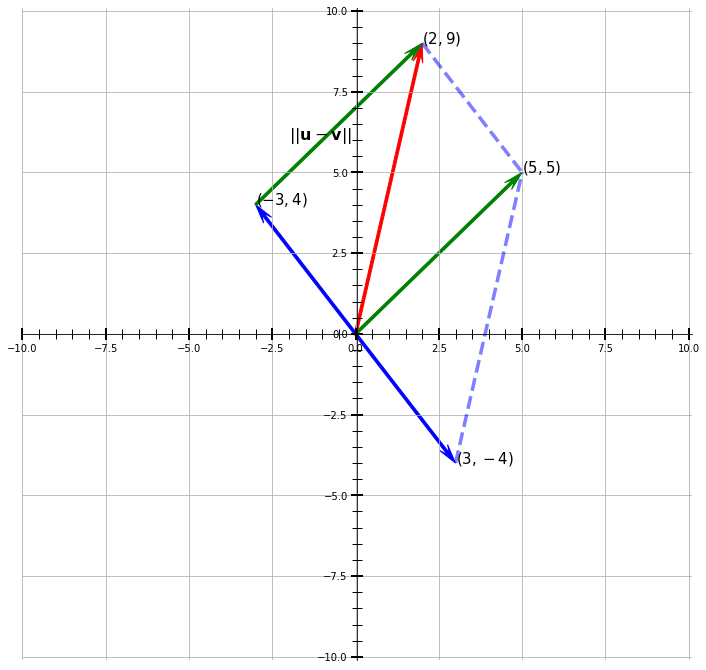

In [12]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[2, 9], [-3, 4], [3, -4], [5, 5]])
col = ['red', 'blue', 'blue', 'green']
cordt = ['$(2, 9)$', '$(-3, 4)$', '$(3, -4)$', '$(5, 5)$']

for i in range(4):
    ax.arrow(0, 0, vects[i, 0], vects[i, 1], color = col[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
ax.grid()

points = np.array([[2, 9], [5, 5], [3, -4], [-3, 4]])

ax.arrow(points[3][0], points[3][1], points[1][0], points[1][1], color = 'green', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)

line1 = np.array([points[0], points[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([points[2], points[1]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.text(-2, 6, '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 16)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

From the graph, we know that the $\|\mathbf{u}-\mathbf{v}\|$ is $\sqrt{5^2 + 5^2}$.

In [13]:
np.sqrt(5**2 + 5**2)

The same results as the ```np.linalg.norm(u - v)```.

# <font face="gotham" color="purple"> Orthogonal Vectors</font>

We have two vectors $\mathbf{u}$ and $\mathbf{v}$, and square the distance of $\|\mathbf{u}+\mathbf{v}\|$ and $\|\mathbf{u}-\mathbf{v}\|$ 

$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} &=\|\mathbf{u}-(-\mathbf{v})\|^{2}=\|\mathbf{u}+\mathbf{v}\|^{2} \\
&=(\mathbf{u}+\mathbf{v}) \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot(\mathbf{u}+\mathbf{v})+\mathbf{v} \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot \mathbf{u}+\mathbf{u} \cdot \mathbf{v}+\mathbf{v} \cdot \mathbf{u}+\mathbf{v} \cdot \mathbf{v} \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}+2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2} &=\|\mathbf{u}\|^{2}+\|-\mathbf{v}\|^{2}+2 \mathbf{u} \cdot(-\mathbf{v}) \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

Suppose $\mathbf{u} = (1, 4)$ and $\mathbf{v} = (-2, 2)$, visualize the vector and distances.

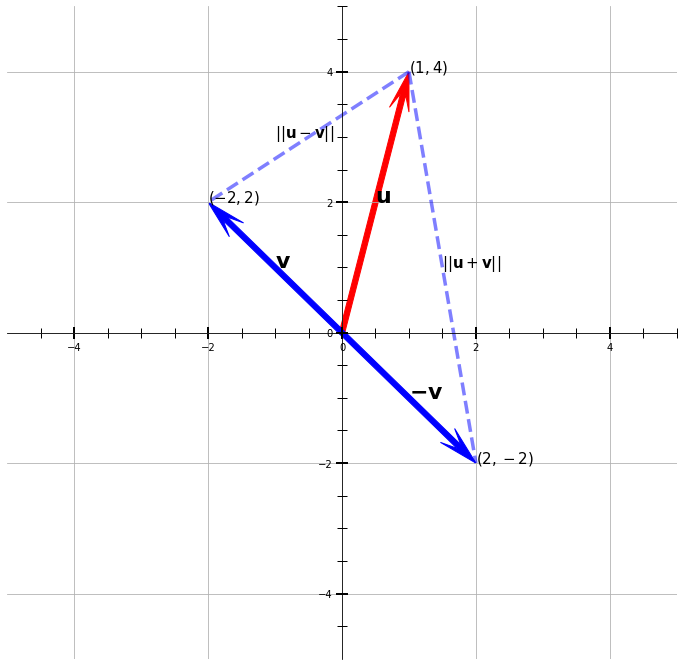

In [14]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2]])
colr = ['red', 'blue', 'blue'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    



############################### Dashed Line #######################
line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

Note that if $\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} = \big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2}$, $\mathbf{u}$ and $\mathbf{v}$ are orthogonal.According to equations above, it must be 

$$\mathbf{u} \cdot \mathbf{v} = 0$$

This is one of the most important conclusion in linear algebra.

Suppose there is another vector $w = (2.5, 2.5)$, let's plot over the graph again.

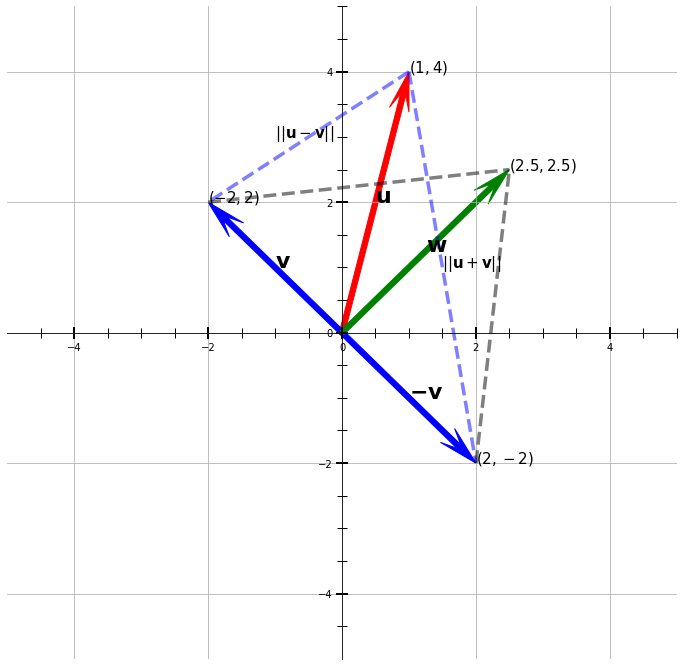

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2], [2.5, 2.5]])
colr = ['red', 'blue', 'blue', 'green'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$', '$(2.5, 2.5)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$', '$\mathbf{w}$']

for i in range(4):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    

############################### Dashed Line #######################

line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line1 = np.array([vects[1], vects[3]])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[2], vects[3]])
ax.plot(line2[:,0], line2[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

Use SciPy built-in function, construct two $2\times 2$ matrices for holding head and tail coordinates of the vector.

In [4]:
a = np.array([[1, 4], [-2, 2]])
b = np.array([[1, 4], [2, -2]])

In [10]:
distance = sp.spatial.distance.pdist(a, 'euclidean'); distance

array([3.60555128])

In [11]:
distance = sp.spatial.distance.pdist(b, 'euclidean');distance

array([6.08276253])

Verify by NumPy ```.norm```.

In [12]:
def dist(u, v):
    a = np.linalg.norm(u - v)
    return a

In [13]:
u = np.array([1, 4])
v = np.array([-2, 2])
dist(u, v)

In [14]:
u = np.array([1, 4])
v = np.array([2, -2])
dist(u, v)

Now Let's test if vector $(2.5, 2.5)^T$ is perpendicular to $(2, -2)^T$ and $(-2, 2)^T$.

In [15]:
a = np.array([[2.5, 2.5], [-2, 2]])
b = np.array([[2.5, 2.5], [2, -2]])
distance1 = sp.spatial.distance.pdist(a, 'euclidean')
distance2 = sp.spatial.distance.pdist(b, 'euclidean')

In [16]:
print(distance1, distance2)

[4.52769257] [4.52769257]


They are the same length, which means $\mathbf{w}\perp \mathbf{v}$ and $\mathbf{w}\perp \mathbf{-v}$.

## <font face="gotham" color="purple"> Orthogonal Complements</font>

In general, the set of all vectors $\mathbf{z}$ that are orthogonal to subspace $W$ is called <font face="gotham" color="red"> orthogonal complement</font>, or denoted as $W^\perp$.

The most common example would be 

$$(\operatorname{Row} A)^{\perp}=\operatorname{Nul} A \quad \text { and } \quad(\operatorname{Col} A)^{\perp}=\operatorname{Nul} A^{T}$$

The nullspace of $A$ is perpendicular to the row space of $A$; the nullspace of $A^T$ is perpendicular to the column space of $A$.

# <font face="gotham" color="purple"> Angles in $\mathbb{R}^n$</font>

There is one formula of calculating angles in vector space, to derive it we need the law of cosine:

$$\|\mathbf{u}-\mathbf{v}\|^{2}=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta$$

Rearrange, we get

$$\begin{aligned}
\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta &=\frac{1}{2}\left[\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-\|\mathbf{u}-\mathbf{v}\|^{2}\right] \\
&=\frac{1}{2}\left[u_{1}^{2}+u_{2}^{2}+v_{1}^{2}+v_{2}^{2}-\left(u_{1}-v_{1}\right)^{2}-\left(u_{2}-v_{2}\right)^{2}\right] \\
&=u_{1} v_{1}+u_{2} v_{2} \\
&=\mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

In statistics, $\cos{\vartheta}$ is called <font face="gotham" color="red"> correlation coefficient </font>.

$$
\cos{\vartheta}=\frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$

## <font face="gotham" color="purple"> Geometric Interpretation of Dot Product</font>

You probably have notices that sometimes <i>dot product</i> and <i>inner product</i> are used interchangeably. Despite that, they do have different meanings. 

Functions and polynomials can have inner product as well, but we usually use dot product to refer to inner product among vector space.

We will show that dot product has an interesting geometric interpretation.

Consider two vectors $\mathbf{a}$ and $\mathbf{u}$, pointing different direction, the angle form by them is $\vartheta$, also $\mathbf{u}$ is a unit vector. We would like to know how much $\mathbf{a}$ is pointing to $\mathbf{u}$'s direction.

And this value can be calculated by projecting $\mathbf{a}$ onto $\mathbf{u}$,

$$
 \|\mathbf{a}\|\cos{\vartheta}=\|\mathbf{a}\| \|\mathbf{u}\|\cos{\vartheta} = \mathbf{a} \cdot\mathbf{u} 
$$

Any vector $\mathbf{b}$ can be normalized as a unit vector $\mathbf{u}$, then perform the calculation above, we can tell how much $\mathbf{b}$ is pointing the direction of $\mathbf{u}$.

# <font face="gotham" color="purple"> Orthogonal Sets</font>

If a set of vectors $S = \left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ in $\mathbb{R}^{n}$ has any arbitrary pair to be orthogonal, i.e. $\mathbf{u}_{i} \cdot \mathbf{u}_{j}=0$ whenever $i \neq j$, $S =\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ is called an <font face="gotham" color="red">orthogonal set</font>. 

Naturally, orthogonal set $S$ is linearly independent, they are also an <font face="gotham" color="red"> orthogonal basis</font> for space spanned by $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$. Orthogonal basis has an advantage is that coordinates of the basis can be quickly computed.

For instance any $\mathbf{y}$ in $W$, 

$$
\mathbf{y}=c_{1} \mathbf{u}_{1}+\cdots+c_{p} \mathbf{u}_{p}
$$

Because it is an orthogonal sets,

$$
\mathbf{y} \cdot \mathbf{u}_{1}=\left(c_{1} \mathbf{u}_{1}+c_{2} \mathbf{u}_{2}+\cdots+c_{p} \mathbf{u}_{p}\right) \cdot \mathbf{u}_{1}=c_{1}\left(\mathbf{u}_{1} \cdot \mathbf{u}_{1}\right)
$$

Thus

$$c_{j}=\frac{\mathbf{y} \cdot \mathbf{u}_{j}}{\mathbf{u}_{j} \cdot \mathbf{u}_{j}} \quad(j=1, \ldots, p)$$

# <font face="gotham" color="purple"> Orthogonal Projection</font>

For any $\mathbf{y}$ in $\mathbb{R}^n$, we want to decompose it as 

$$
\mathbf{y} = \alpha \mathbf{u}+\mathbf{z} = \hat{\mathbf{y}}+\mathbf{z}
$$

where $ \mathbf{u}$ is perpendicular to $\mathbf{z}$, $\alpha$ is a scalar.And the subspace $L$ spanned by $\mathbf{u}$, the projection of $\mathbf{y}$ onto $L$ is denoted as

$$\hat{\mathbf{y}}=\operatorname{proj}_{L} \mathbf{y}=\frac{\mathbf{y} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$$

Becasue $\mathbf{u}\perp \mathbf{z}$, then $\mathbf{u}\cdot \mathbf{z} = 0$, replace $\mathbf{z}$ by $\mathbf{y}- \alpha \mathbf{u}$:

$$
(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0\\
\alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}
$$

Now we get the formula for projection onto $L$ spanned by $\mathbf{u}$.

## <font face="gotham" color="purple"> A Visual Example in $\mathbb{R}^T$</font>

Suppose we have $\mathbf{y} = (2, 5)^T$, $\mathbf{u} = (3, 1)^T$. Plot $\hat{\mathbf{y}}$ onto the subspace spanned $L$ by $\mathbf{u}$.

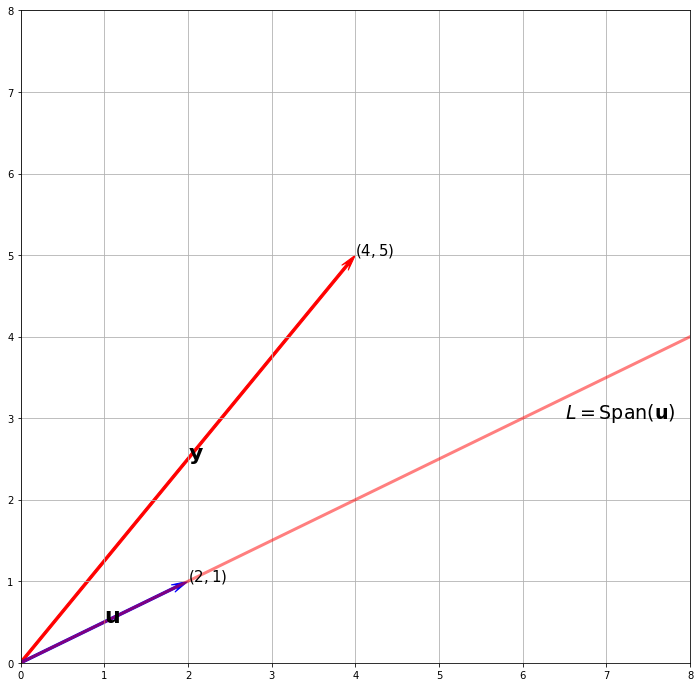

In [17]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1]])
colr = ['red', 'blue'] 
cordt = ['$(4, 5)$', '$(2, 1)$']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$']

for i in range(2):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

Let's use formula to compute $\alpha$ and $\hat{\mathbf{y}}$.

In [20]:
y = np.array([4, 5])
u = np.array([2, 1])
alpha = (y@u)/(u@u);alpha

In [21]:
yhat = alpha*u;yhat

array([5.2, 2.6])

With results above, we can plot the orthogonal projection.

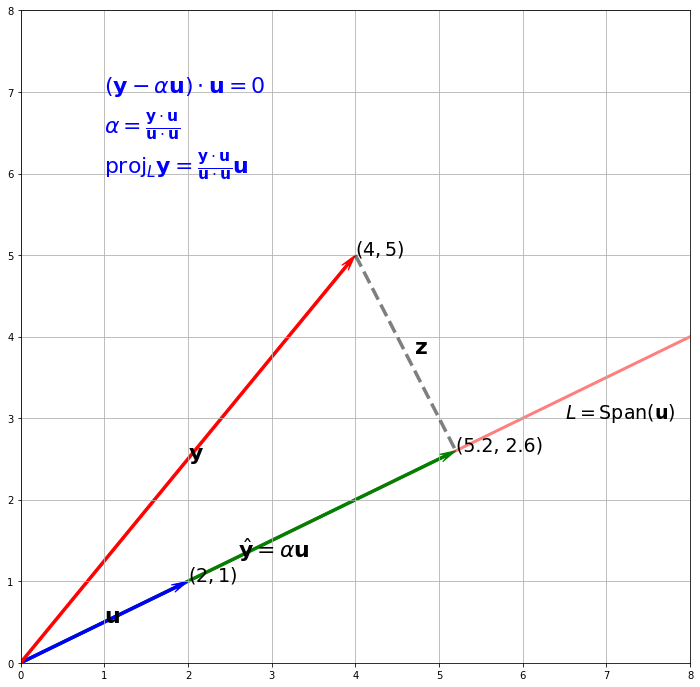

In [19]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1], [5.2, 2.6]])
colr = ['red', 'blue', 'green'] 
cordt = ['$(4, 5)$', '$(2, 1)$', '(5.2, 2.6)']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$', r'$\hat{\mathbf{y}} = \alpha\mathbf{u}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4, zorder = -i)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 19)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

##################################### Components of y orthogonal to u ##########################

point1 = [4, 5]
point2 = [5.2, 2.6]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')
ax.text(4.7, 3.8, '$\mathbf{z}$', size = 22)
################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5, zorder = -3)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

#################################### Formula ################################
ax.text(x = 1, y = 7, 
        s = r'$(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6.5, 
        s = r'$\alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6, 
        s = r'$\operatorname{proj}_{L}\mathbf{y}=\frac{\mathbf{y}\cdot\mathbf{u}}{\mathbf{u}\cdot\mathbf{u}}\mathbf{u}$',
        size = 22, color = 'b')
plt.show()

## <font face="gotham" color="purple"> The Orthogonal Decomposition Theorem</font>

To generalize the orthogonal projection in the higher dimension $\mathbb{R}^n$, we summarize the idea into the <font face="gotham" color="red"> orthogonal decomposition theorem</font>.

Let $W$ be a subspace of $\mathbb{R}^{n}$. Then each $\mathbf{y}$ in $\mathbb{R}^{n}$ can be written uniquely in the form
$$
\mathbf{y}=\hat{\mathbf{y}}+\mathbf{z}
$$
where $\hat{\mathbf{y}}$ is in $W$ and $\mathbf{z}$ is in $W^{\perp} .$ In fact, if $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ is any orthogonal basis of $W,$ then
$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{\mathbf{u}_{p} \cdot \mathbf{u}_{p}} \mathbf{u}_{p}
$$
and $\mathbf{z}=\mathbf{y}-\hat{\mathbf{y}}$.

In $\mathbb{R}^{2}$, we project $\mathbf{y}$ onto subspace $L$ which is spanned by $\mathbf{u}$, here we generalize the formula for $\mathbb{R}^{n}$, that $\mathbf{y}$ is projected onto $W$ which is spanned by $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$.

## <font face="gotham" color="purple"> A Visual Example in $\mathbb{R}^{3}$</font>

A subspace $W=\operatorname{Span}\left\{\mathbf{u}_{1}, \mathbf{u}_{2}\right\}$, and a vector $\mathbf{y}$ is not in $W$, decompose $\mathbf{y}$ into $\hat{\mathbf{y}} + \mathbf{z}$, and plot them.

where 

$$\mathbf{u}_{1}=\left[\begin{array}{r}
2 \\
5 \\
-1
\end{array}\right], \mathbf{u}_{2}=\left[\begin{array}{r}
-2 \\
1 \\
1
\end{array}\right], \text { and } \mathbf{y}=\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]$$

The projection onto $W$ in $\mathbb{R}^3$ is 

$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}
$$

The codes for plotting are quite redundent, however exceedingly intuitive.

<IPython.core.display.Javascript object>


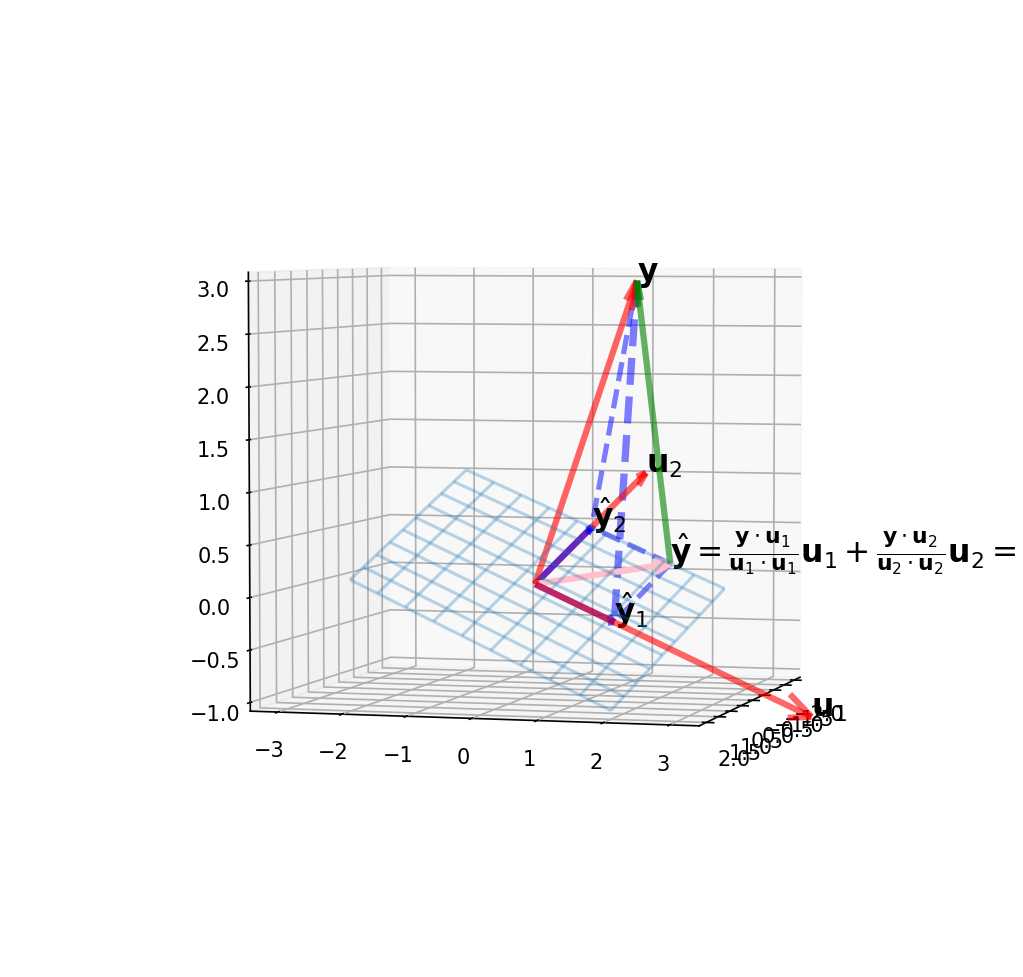

In [26]:
%matplotlib notebook

######################## Subspace W ##############################
s = np.linspace(-.5, .5, 10)
t = np.linspace(-.5, .5, 10)
S, T = np.meshgrid(s, t)

X1 = 2 * S - 2 * T
X2 = 5 * S + T
X3 = -S + T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, alpha = .3)

########################### vector y ###############################
y = np.array([1, 2, 3])
u1, u2 = np.array([2, 5, -1]), np.array([-2, 1, 1])

vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

ax.text(y[0], y[1], y[2], '$\mathbf{y}$', size = 15)
########################### vector u1 and u2 ###############################

vec = np.array([[0, 0, 0, u1[0], u1[1], u1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, u2[0], u2[1], u2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(u1[0], u1[1], u1[2], '$\mathbf{u}_1$', size = 15)
ax.text(u2[0], u2[1], u2[2], '$\mathbf{u}_2$', size = 15)
###########################  yhat ###############################

alpha1 = (y@u1)/(u1@u1)
alpha2 = (y@u2)/(u2@u2)

yhat1 = alpha1*u1
yhat2 = alpha2*u2
yhat = yhat1 + yhat2

vec = np.array([[0, 0, 0, yhat1[0], yhat1[1], yhat1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat2[0], yhat2[1], yhat2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat[0], yhat[1], yhat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'pink', alpha = 1,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

ax.text(yhat1[0], yhat1[1], yhat1[2], '$\hat{\mathbf{y}}_1$', size = 15)
ax.text(yhat2[0], yhat2[1], yhat2[2], '$\hat{\mathbf{y}}_2$', size = 15)
ax.text(x = yhat[0], y = yhat[1], z = yhat[2], 
        s = r'$\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}$', size = 15)
###########################  z ###############################
z = y - yhat
vec = np.array([[yhat[0], yhat[1], yhat[2], z[0], z[1], z[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

############################ Dashed Line ####################

line1 = np.array([y, yhat1])
ax.plot(line1[:,0], line1[:,1], line1[:,2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([y, yhat2])
ax.plot(line2[:,0], line2[:,1], line2[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line3 = np.array([yhat, yhat2])
ax.plot(line3[:,0], line3[:,1], line3[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line4 = np.array([yhat, yhat1])
ax.plot(line4[:,0], line4[:,1], line4[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

############################# View Angel
ax.view_init(elev=-6, azim=12)

# <font face="gotham" color="purple"> Orthonormal Sets</font>

An <font face="gotham" color="red"> orthonormal set</font> is obtained from normalizing the orthogonal set, and also called <font face="gotham" color="red">orthonomal basis</font>.

Matrices whose columns form an orthonormal set are important for matrix computation.

Let $U=\left[\begin{array}{lll}
\mathbf{u}_{1} & \mathbf{u}_{2} & \mathbf{u}_{3}
\end{array}\right]$, where $\mathbf{u}_{i}$'s are from an orthonormal set, the outer product, $U^TU$ is

$$U^{T} U=\left[\begin{array}{l}
\mathbf{u}_{1}^{T} \\
\mathbf{u}_{2}^{T} \\
\mathbf{u}_{3}^{T}
\end{array}\right]\left[\begin{array}{lll}
\mathbf{u}_{1} & \mathbf{u}_{2} & \mathbf{u}_{3}
\end{array}\right]=\left[\begin{array}{lll}
\mathbf{u}_{1}^{T} \mathbf{u}_{1} & \mathbf{u}_{1}^{T} \mathbf{u}_{2} & \mathbf{u}_{1}^{T} \mathbf{u}_{3} \\
\mathbf{u}_{2}^{T} \mathbf{u}_{1} & \mathbf{u}_{2}^{T} \mathbf{u}_{2} & \mathbf{u}_{2}^{T} \mathbf{u}_{3} \\
\mathbf{u}_{3}^{T} \mathbf{u}_{1} & \mathbf{u}_{3}^{T} \mathbf{u}_{2} & \mathbf{u}_{3}^{T} \mathbf{u}_{3}
\end{array}\right]$$

And $\mathbf{u}_{i}^{T} \mathbf{u}_{j}, i, j \in (1, 2, 3)$ is an inner product.

Because of orthonormal sets, we have 

$$
\mathbf{u}_{1}^{T} \mathbf{u}_{2}=\mathbf{u}_{2}^{T} \mathbf{u}_{1}=0, \quad \mathbf{u}_{1}^{T} \mathbf{u}_{3}=\mathbf{u}_{3}^{T} \mathbf{u}_{1}=0, \quad \mathbf{u}_{2}^{T} \mathbf{u}_{3}=\mathbf{u}_{3}^{T} \mathbf{u}_{2}=0\\
\mathbf{u}_{1}^{T} \mathbf{u}_{1}=1, \quad \mathbf{u}_{2}^{T} \mathbf{u}_{2}=1, \quad \mathbf{u}_{3}^{T} \mathbf{u}_{3}=1
$$

which means

$$
U^TU = I
$$

Recall that we have a general projection formula 

$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{\mathbf{u}_{p} \cdot \mathbf{u}_{p}} \mathbf{u}_{p}
=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{{\mathbf{u}_{1}^T} \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{{\mathbf{u}_{p}^T} \mathbf{u}_{p}} \mathbf{u}_{p}\\
$$


If the $\{\mathbf{u}_1,...,\mathbf{u}_p\}$ is an orthonormal set, then 

\begin{align}
\hat{\mathbf{y}}&=\left(\mathbf{y} \cdot \mathbf{u}_{1}\right) \mathbf{u}_{1}+\left(\mathbf{y} \cdot \mathbf{u}_{2}\right) \mathbf{u}_{2}+\cdots+\left(\mathbf{y} \cdot \mathbf{u}_{p}\right) \mathbf{u}_{p}\\
& = \left(\mathbf{u}_{1}^T\mathbf{y}\right) \mathbf{u}_{1}+\left(\mathbf{u}_{2}^T\mathbf{y}\right) \mathbf{u}_{2}+\cdots+\left(\mathbf{u}_{p}^T\mathbf{y}\right) \mathbf{u}_{p}\\
\end{align}

# <font face="gotham" color="purple">Cross Product</font>

This is the formula of Cross product
$$
\mathbf{a} \times \mathbf{b}=\|\mathbf{a}\|\|\mathbf{b}\| \sin (\theta) \mathbf{n}
$$
The output of cross product is the length of vector $\mathbf{c}$ which is perpendicular to both $\mathbf{a} $ and $\mathbf{b} $. 

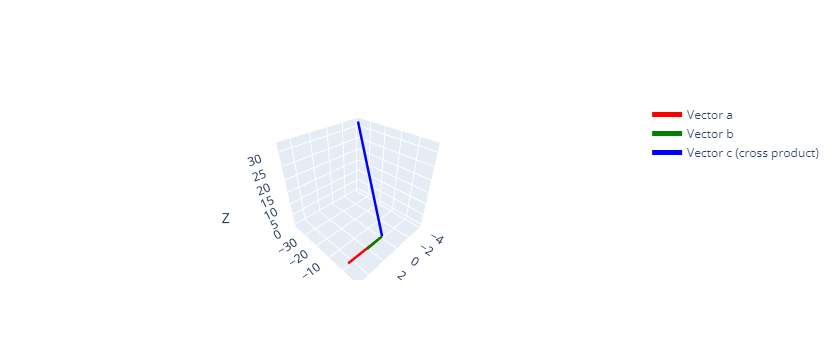

In [5]:
import plotly.graph_objects as go

# Define the two vectors
a = np.array([5, 2, 3])
b = np.array([4, 8, 10])

# Calculate the cross product
c = np.cross(a, b)

# Create the 3D plot
fig = go.Figure(data=[
    go.Scatter3d(x=[0, a[0]], y=[0, a[1]], z=[0, a[2]], mode='lines', name='Vector a', line=dict(color='red', width=5)),
    go.Scatter3d(x=[0, b[0]], y=[0, b[1]], z=[0, b[2]], mode='lines', name='Vector b', line=dict(color='green', width=5)),
    go.Scatter3d(x=[0, c[0]], y=[0, c[1]], z=[0, c[2]], mode='lines', name='Vector c (cross product)', line=dict(color='blue', width=5))
])

# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Show the plot
fig.show()
